In [1]:
from subprocess import call

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
def eval_p(m1: float, l1: float, m2: float, l2: float, e: float) -> float:
    """Calcula o momento angular do pêndulo.

    Parameters
    ----------
    m1 : float
    l1 : float
    m2 : float
    l2 : float
    e : float

    Returns
    -------
    float
    """    
    g = 10
    return np.sqrt(2*m1*l1**2*(e - m2*g*l2))

In [127]:
# Energias que serão utilizadas
energies = np.arange(0.1, 2.1, 0.1)

# Parâmetros padrão
parameters = [{
    "m1": 0.1,
    "m2": 0.001,
    "l1": 0.5,
    "l2": 0.2,
    "theta1": 0,
    "theta2": 1.5708,
    "p1": None,
    "p2": 0,
    "e": e,
    "h": 0.01,
    "tf": 500,
} for e in energies]

# Adicionando o momento angular p1
for p in parameters:
    p["p1"] = eval_p(p["m1"], p["l1"], p["m2"], p["l2"], p["e"])

# # Rodando as simulações
# for index, params in enumerate(parameters):
#     # Remove a energia do dicionário
#     params = {k: v for k, v in params.items() if k != "e"}
#     call(
#         [
#             "python3",
#             "main.py",
#             *list(map(lambda x: f"--{x[0]}={x[1]}", params.items())),
#             f"--output=results/{index}.csv",
#         ]
#     )

# Carregando os resultados
df = None
for index, params in enumerate(parameters):
    df_tmp = pd.read_csv(f"results/{index}.csv")
    df_tmp["index"] = params["e"]
    if df is None:
        df = df_tmp
    else:
        df = pd.concat([df, df_tmp])

/var/folders/cx/_fn49v456p1_8_1r6hk_9q7r0000gn/T/ipykernel_69527/2024484110.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


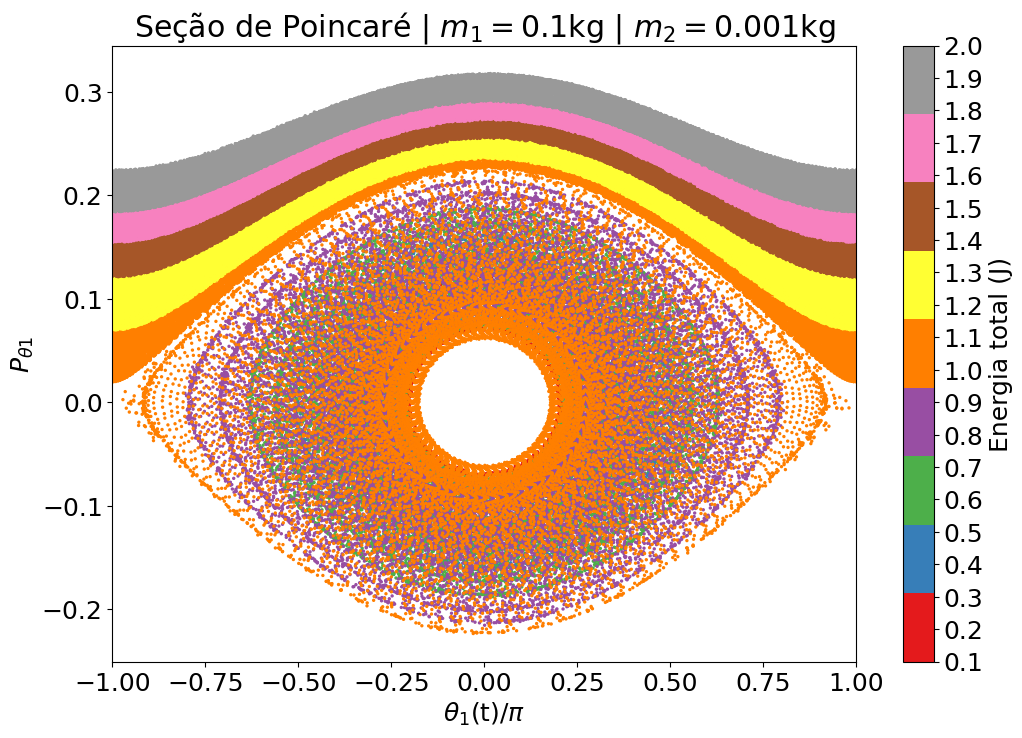

In [112]:
plt.rc('font', size=18)

# Filtra os pontos de cruzamento
crossings = df[
    (df["theta2"].shift(1) > 0)
    & (df["theta2"] < 0)
    # & (df["index"] == 1.7)
]

fig, ax = plt.subplots()
sc = ax.scatter(
    crossings["theta1"] / np.pi,
    crossings["p1"],
    c=crossings["index"],
    s=2,
    cmap="Set1"
)
ax.set_title("Seção de Poincaré | $m_1=0.1$kg | $m_2=0.001$kg")
ax.set_xlabel(r"$\theta_1$(t)$/\pi$")
ax.set_ylabel(r"$P_{\theta1}$")
ax.colorbar = plt.colorbar(sc, ax=ax)
ax.colorbar.set_label("Energia total (J)")
ax.colorbar.set_ticks(np.arange(0.1, 2.1, 0.1))
ax.set_xlim(-1, 1)
fig.set_size_inches(12, 8)
fig.show()

In [ ]:
fig, axs = plt.subplots(10, 2, sharex=True, sharey=True)
for ax, params in zip(axs.flat, parameters):
    df_plt = df[df["index"] == params["e"]]
    df_plt = df_plt.iloc[6000:7000].copy()

    # Calcula x e y em coordenadas cartesianas
    df_plt["x1"] = params["l1"] * np.sin(df_plt["theta1"])
    df_plt["y1"] = -params["l1"] * np.cos(df_plt["theta1"])
    df_plt["x2"] = df_plt["x1"] + params["l2"] * np.sin(df_plt["theta2"])
    df_plt["y2"] = df_plt["y1"] - params["l2"] * np.cos(df_plt["theta2"])

    ax.scatter(df_plt["x1"], df_plt["y1"], s=1, c=df_plt.index, cmap="Reds")
    ax.scatter(df_plt["x2"], df_plt["y2"], s=1, c=df_plt.index, cmap="Blues")
    ax.set_title(f"Energia: {params['e']:.2f}J")
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")

# Tamanho da figura
fig.set_size_inches(18, 66)
fig.tight_layout()
fig.show()

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 150
plt.ioff()
fig, ax = plt.subplots()

df_anim = df
df_anim = df_anim.iloc[-300:].copy()

# Calcula x e y em coordenadas cartesianas
df_anim["x1"] = params["l1"] * np.sin(df_anim["theta1"])
df_anim["y1"] = -params["l1"] * np.cos(df_anim["theta1"])
df_anim["x2"] = df_anim["x1"] + params["l2"] * np.sin(df_anim["theta2"])
df_anim["y2"] = df_anim["y1"] - params["l2"] * np.cos(df_anim["theta2"])
def animate(t):
    plt.cla()
    x1, y1 = df_anim["x1"].iloc[t], df_anim["y1"].iloc[t]
    x2, y2 = df_anim["x2"].iloc[t], df_anim["y2"].iloc[t]

    ax.plot([0, x1], [0, y1], "o-")
    ax.plot([x1, x2], [y1, y2], "o-")
    ax.plot(x1, y1, "o", color="blue")
    ax.plot(x2, y2, "o", color="red")

    ax.set_xlim(xmin=-0.7, xmax=0.7)
    ax.set_ylim(ymin=-0.7, ymax=0.7)

matplotlib.animation.FuncAnimation(fig, animate, frames=len(df_anim), interval=20)

/var/folders/cx/_fn49v456p1_8_1r6hk_9q7r0000gn/T/ipykernel_69527/1620672238.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


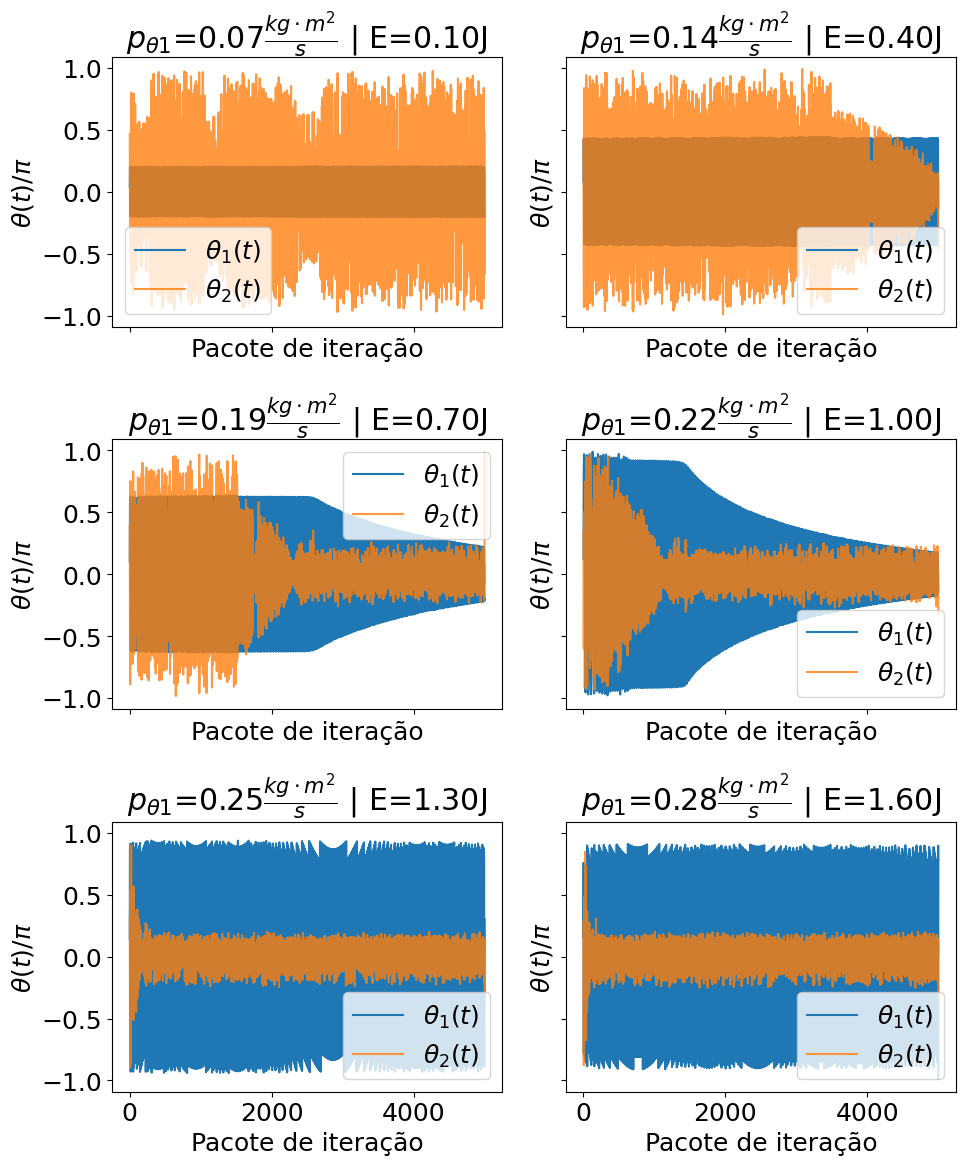

In [119]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
for ax, params in zip(axs.flat, parameters[::3]):
    df_plt = df[df["index"] == params["e"]].copy()
    df_plt = df_plt.groupby(np.arange(len(df_tmp)) // 10).mean()

    ax.plot(df_plt["theta1"]/np.pi, label=r"$\theta_1(t)$")
    ax.plot(df_plt["theta2"]/np.pi, alpha=0.8, label=r"$\theta_2(t)$")
    ax.set_title(r"$p_{\theta1}$" + f"={params['p1']:.2f}" + r"$\frac{kg \cdot m^2}{s}$" + f" | E={params['e']:.2f}J")
    ax.set_xlabel("Pacote de iteração")
    ax.set_ylabel(r"$\theta(t)$/$\pi$")
    ax.legend()

# Tamanho da figura
fig.set_size_inches(10, 12)
fig.tight_layout()
fig.show()

In [154]:
df[df["index"] == 1]["energy"].mean()
# df["index"]

1.5645981970454745

In [148]:
parameters

[{'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.07,
  'p2': 0,
  'e': 0.1,
  'h': 0.01,
  'tf': 500},
 {'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.099498743710662,
  'p2': 0,
  'e': 0.2,
  'h': 0.01,
  'tf': 500},
 {'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.12206555615733704,
  'p2': 0,
  'e': 0.30000000000000004,
  'h': 0.01,
  'tf': 500},
 {'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.14106735979665885,
  'p2': 0,
  'e': 0.4,
  'h': 0.01,
  'tf': 500},
 {'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.157797338380595,
  'p2': 0,
  'e': 0.5,
  'h': 0.01,
  'tf': 500},
 {'m1': 0.1,
  'm2': 0.001,
  'l1': 0.5,
  'l2': 0.2,
  'theta1': 0,
  'theta2': 1.5708,
  'p1': 0.17291616465790582,
  'p2': 0,
  'e': 0.6,
  'h': 0.01,
  'tf': 5